# Exploratory Data Analysis

In this file, we delve into the exploratory data analysis (EDA) phase of the project. The primary objective is to gain a deeper understanding of the sentiment analysis dataset through visualization and statistical techniques. We'll analyze the distribution of sentiment labels, explore the most frequent words and phrases in different sentiment categories, and investigate any patterns or trends in the data. EDA plays a crucial role in identifying insights, anomalies, and potential challenges in the dataset, setting the groundwork for further analysis and model building. Through data visualization and exploration, we aim to uncover valuable information that can inform decision-making and guide subsequent steps in the sentiment analysis project.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [2]:
# Load "sentiment_results.csv" and display a random sample of 10 rows

results_df = pd.read_csv('../dataset/sentiment_results.csv')
results_df.sample(10)

,corpus_name,raw_sentence,clean_text,textblob_polarity,sentiment_textblob
834274,sentiment140,"i'm addicted to typing maniac. but, i'm not that good",addicted typing maniac good,0.15,Moderately Positive
1025403,sentiment140,"@snydez it's Morrissey, Manchester own superstar artist!",morrissey manchester superstar artist,0.00,Neutral
445504,sentiment140,SO COLD!!!!,cold,-0.60,Negative
452622,sentiment140,Got to see aaron last nite. now he's on his way to Florida. Goin to work,got see aaron last nite way florida goin work,0.00,Neutral
692593,sentiment140,@Mama_Gedlu well at least it got better I'm home sick,well least got better home sick,-0.17,Moderately Negative
1201347,sentiment140,I'm the happiest alive. My girl just woke up to talk to me drunk. I love that girl. Boo boo i love ypj i'm drunk.,happiest alive girl woke talk drunk love boo ypj,0.03,Neutral
806565,sentiment140,"@quixee Pick a response: A) I hate you B) Yup, get over here.",pick response hate yup get,-0.80,Negative
323996,sentiment140,@Ashcoates my tickets av been disptched on 29th.. but not arrived at work.. it wasnt a good idea 2get them sent ot work was it? OH NO!!!,ticket av disptched th arrived work wasnt good idea get sent ot oh,0.70,Positive
1212299,sentiment140,chillin at the rooftoop on a rainy sunday.. thank god for WiFi.,chillin rooftoop rainy sunday thank god wifi,0.00,Neutral
1256136,sentiment140,@bigkelleh @sfenton24 Sounds fabulous.,sound fabulous,0.40,Moderately Positive


In [3]:
# sentiment_results data overview
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651494 entries, 0 to 1651493
Data columns (total 5 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   corpus_name         1651494 non-null  object 
 1   raw_sentence        1651494 non-null  object 
 2   clean_text          1642544 non-null  object 
 3   textblob_polarity   1651494 non-null  float64
 4   sentiment_textblob  1651494 non-null  object 
dtypes: float64(1), object(4)
memory usage: 63.0+ MB


In [4]:
# check the size of the dataframe
results_df.shape

(1651494, 5)

In [5]:
# check the statistics of the dataframe
results_df.describe()

,textblob_polarity
count,1.651494e+06
mean,9.826804e-02
std,3.327896e-01
min,-1.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,2.900000e-01
max,1.000000e+00


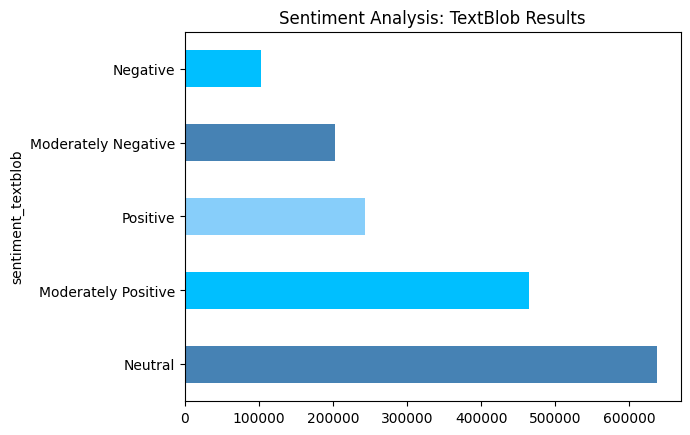

In [6]:
import matplotlib.pyplot as plt

# Title for the Sentiment Analysis Plot
plt.title("Sentiment Analysis: TextBlob Results")

# Y-axis Label for the Sentiment Categories
plt.ylabel("Sentiment Label")

# Plotting the Sentiment Analysis Results as a Horizontal Bar Chart
results_df["sentiment_textblob"].value_counts().plot(kind="barh", color=['steelblue', 'deepskyblue', 'lightskyblue'])

# Display the Plot
plt.show()

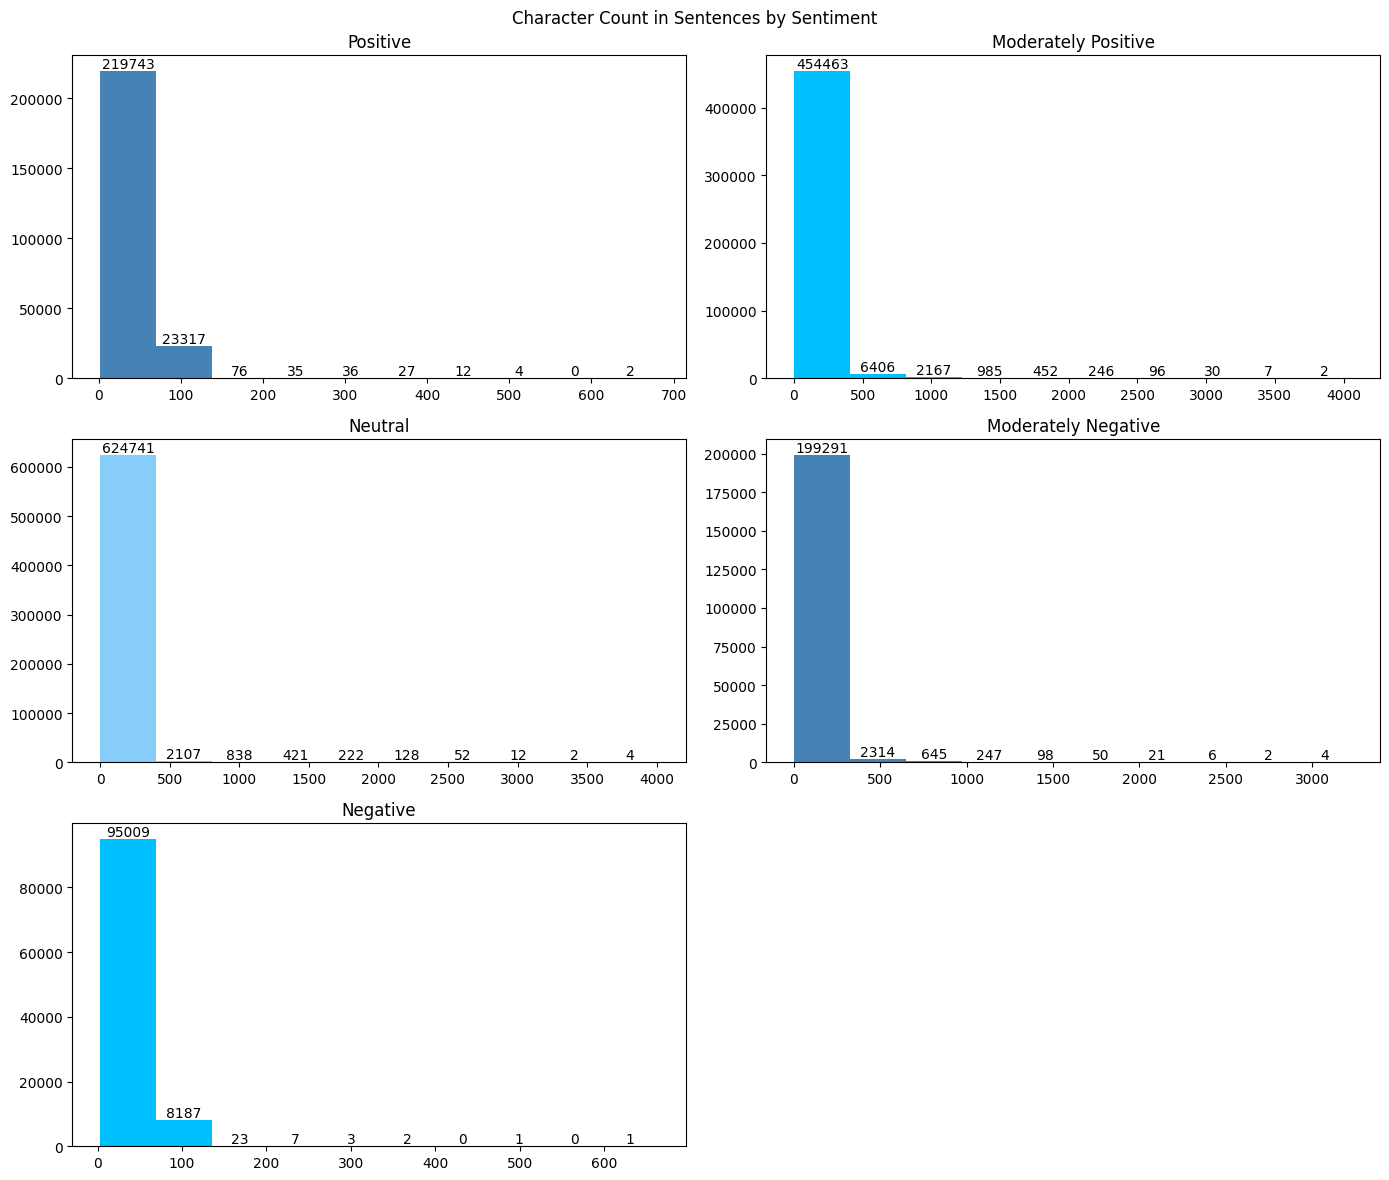

In [7]:
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Create subplots with 3 rows and 2 columns, and set figure size
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Define the sentiment categories
sentiment_categories = ['Positive', 'Moderately Positive', 'Neutral', 'Moderately Negative', 'Negative']

# Define custom colors for each sentiment category
color_dict = {
    'Positive': 'steelblue',
    'Moderately Positive': 'deepskyblue',
    'Neutral': 'lightskyblue',
    'Moderately Negative': 'steelblue',
    'Negative': 'deepskyblue'
}

# Loop through each sentiment category and plot the histogram
for i, sentiment_category in enumerate(sentiment_categories):
    df_len = results_df[results_df['sentiment_textblob'] == sentiment_category]['clean_text'].str.len()
    if not df_len.empty:
        ax = axes[i // 2, i % 2]
        n, bins, patches = ax.hist(df_len, color=color_dict[sentiment_category])  # Use the corresponding color
        ax.set_title(sentiment_category)

        # Add values on top of each bar
        for value, patch in zip(n, patches):
            height = patch.get_height()
            ax.text(patch.get_x() + patch.get_width() / 2, height + 5, str(int(value)), ha='center', va='bottom')

# Remove empty subplots
for i in range(len(sentiment_categories), 3 * 2):
    fig.delaxes(axes.flatten()[i])

# Set overall title for the subplots
fig.suptitle('Character Count in Sentences by Sentiment')

# Adjust the spacing between subplots for better readability
plt.tight_layout()

# Display the subplots
plt.show()


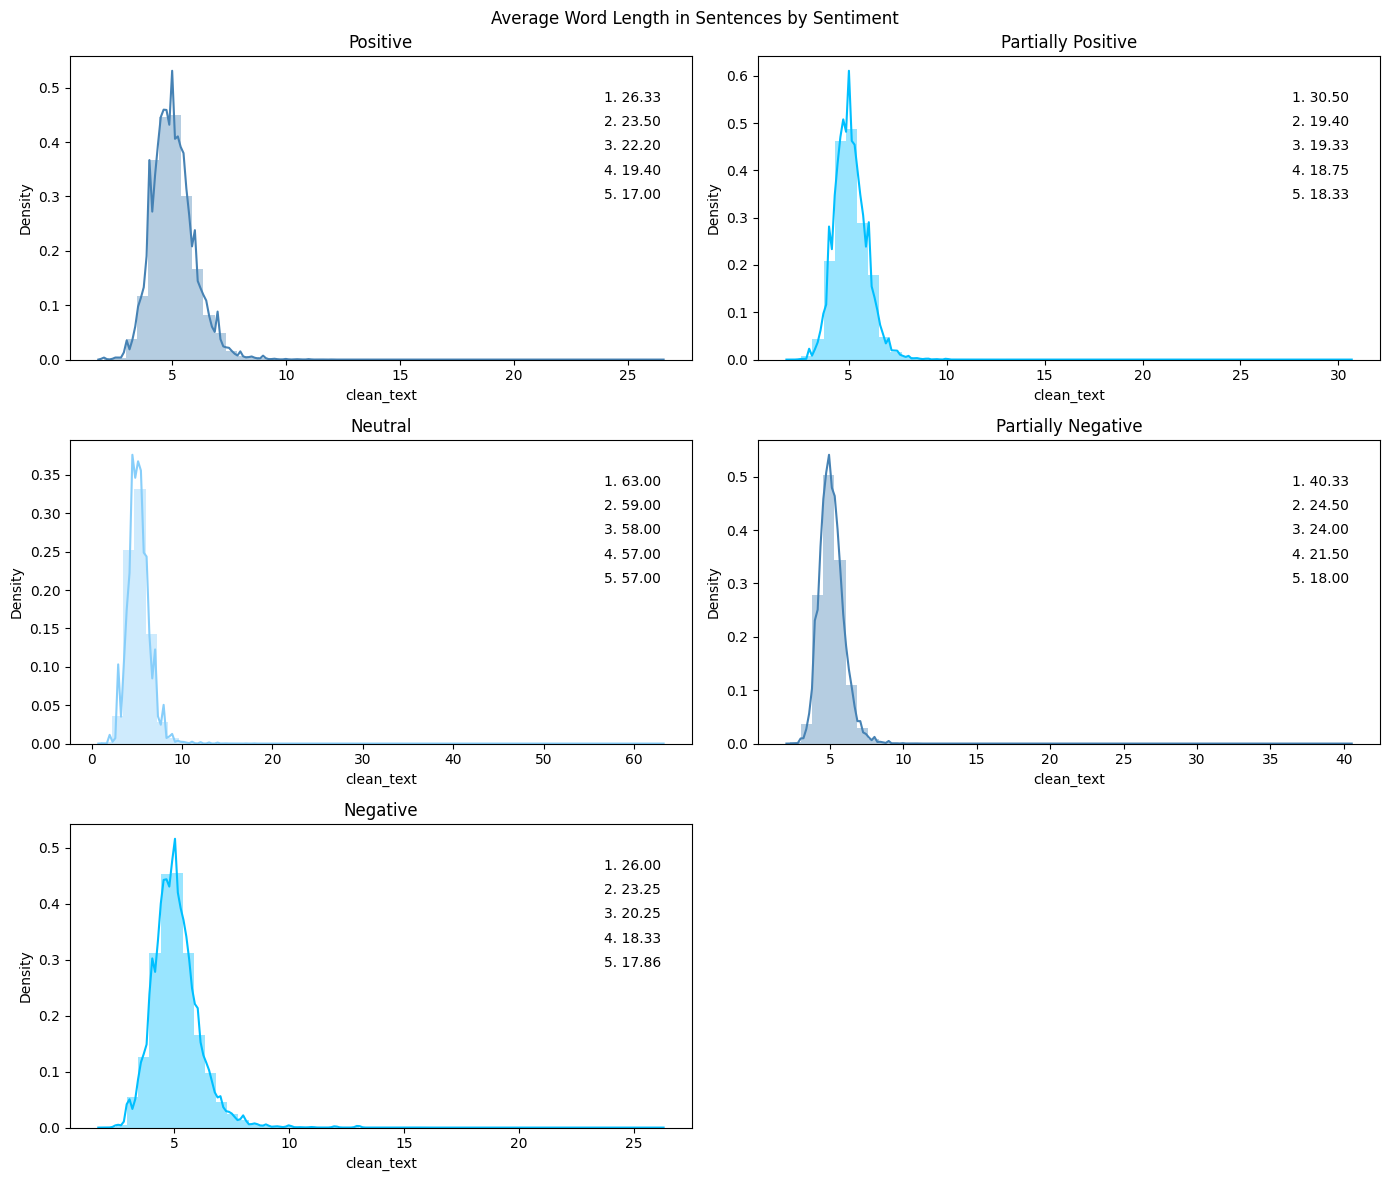

In [18]:
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Create subplots with 3 rows and 2 columns, and set figure size
fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Calculate the average word length for each sentiment category
word_lengths_positive = results_df[results_df['sentiment_textblob'] == 'Positive']['clean_text'].str.split().apply(lambda x: [len(i) for i in x])
word_lengths_partially_positive = results_df[results_df['sentiment_textblob'] == 'Moderately Positive']['clean_text'].str.split().apply(lambda x: [len(i) for i in x])
word_lengths_neutral = results_df[results_df['sentiment_textblob'] == 'Neutral']['clean_text'].apply(str).str.split().apply(lambda x: [len(i) for i in x])
word_lengths_partially_negative = results_df[results_df['sentiment_textblob'] == 'Moderately Negative']['clean_text'].apply(str).str.split().apply(lambda x: [len(i) for i in x])
word_lengths_negative = results_df[results_df['sentiment_textblob'] == 'Negative']['clean_text'].apply(str).str.split().apply(lambda x: [len(i) for i in x])

# Function to annotate the bars
def annotate_bars(ax, values):
    top_values = [value for value in values if value > 0.0]
    top_values = np.sort(top_values)[-5:]  # Get top 5 non-zero values
    for value, p in zip(values, ax.patches):
        height = p.get_height()
        if height > 0.0 and value in top_values:
            ax.annotate(format(height, '.2f'), (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    # Display top 5 values on the subplot
    top_values = np.sort(top_values)[::-1]
    top_values = top_values[:5]  # Get top 5 values
    for i, value in enumerate(top_values):
        ax.text(0.95, 0.85 - i * 0.08, f'{i + 1}. {value:.2f}', transform=ax.transAxes, ha='right', fontsize=10, color='black')

# Plot histograms for each sentiment category
sns.distplot(word_lengths_positive.map(lambda x: np.mean(x)), ax=axs[0, 0], color='steelblue')
axs[0, 0].set_title('Positive')
annotate_bars(axs[0, 0], word_lengths_positive.map(lambda x: np.mean(x)))

sns.distplot(word_lengths_partially_positive.map(lambda x: np.mean(x)), ax=axs[0, 1], color='deepskyblue')
axs[0, 1].set_title('Partially Positive')
annotate_bars(axs[0, 1], word_lengths_partially_positive.map(lambda x: np.mean(x)))

sns.distplot(word_lengths_neutral.map(lambda x: np.mean(x)), ax=axs[1, 0], color='lightskyblue')
axs[1, 0].set_title('Neutral')
annotate_bars(axs[1, 0], word_lengths_neutral.map(lambda x: np.mean(x)))

sns.distplot(word_lengths_partially_negative.map(lambda x: np.mean(x)), ax=axs[1, 1], color='steelblue')
axs[1, 1].set_title('Partially Negative')
annotate_bars(axs[1, 1], word_lengths_partially_negative.map(lambda x: np.mean(x)))

sns.distplot(word_lengths_negative.map(lambda x: np.mean(x)), ax=axs[2, 0], color='deepskyblue')
axs[2, 0].set_title('Negative')
annotate_bars(axs[2, 0], word_lengths_negative.map(lambda x: np.mean(x)))

# Remove empty subplots in the third row
fig.delaxes(axs[2, 1])

# Set overall title for the subplots
fig.suptitle('Average Word Length in Sentences by Sentiment')

# Adjust the spacing between subplots for better readability
plt.tight_layout()

# Display the subplots
plt.show()


In [9]:
results_df["sentiment_textblob"].value_counts()

sentiment_textblob
Neutral                637477
Moderately Positive    464854
Positive               243252
Moderately Negative    202678
Negative               103233
Name: count, dtype: int64

In [10]:
results_df["sentiment_textblob"].value_counts(normalize=True).to_frame().style.format('{:.2%}')

,proportion
sentiment_textblob,
Neutral,38.60%
Moderately Positive,28.15%
Positive,14.73%
Moderately Negative,12.27%
Negative,6.25%


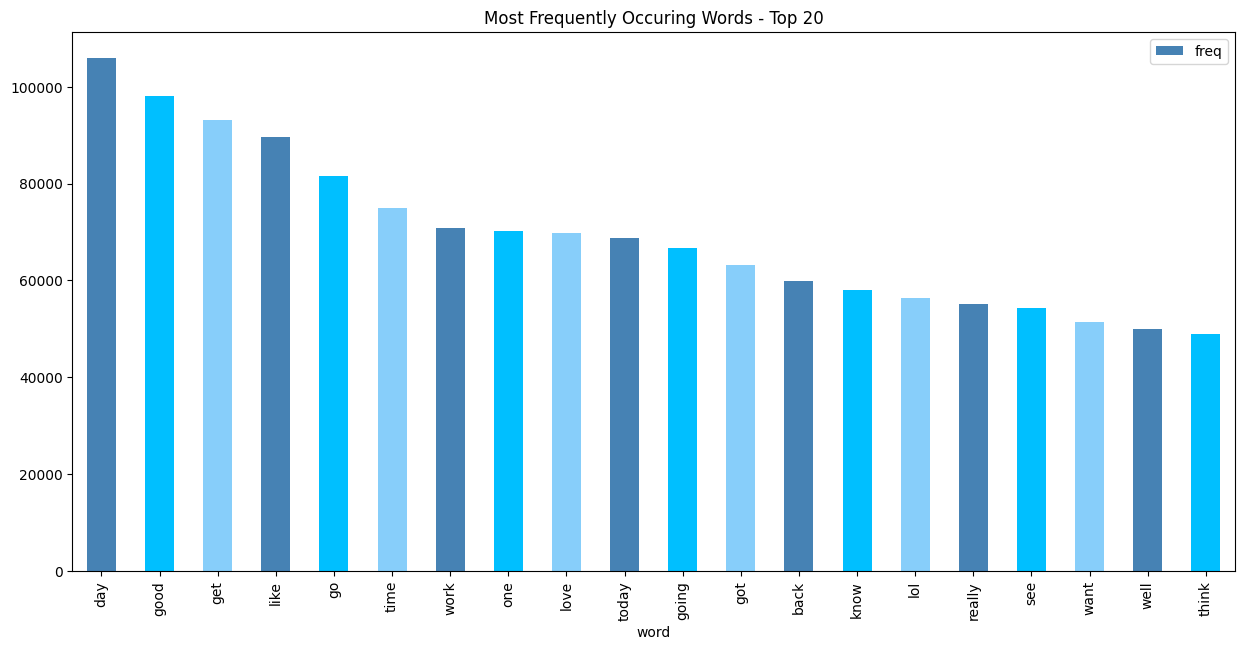

In [11]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
words = cv.fit_transform(results_df.clean_text.values.astype('U'))

sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color=['steelblue', 'deepskyblue', 'lightskyblue'])
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

Sentiment: Negative
Sentiment: Moderately Negative
Sentiment: Neutral
Sentiment: Moderately Positive
Sentiment: Positive


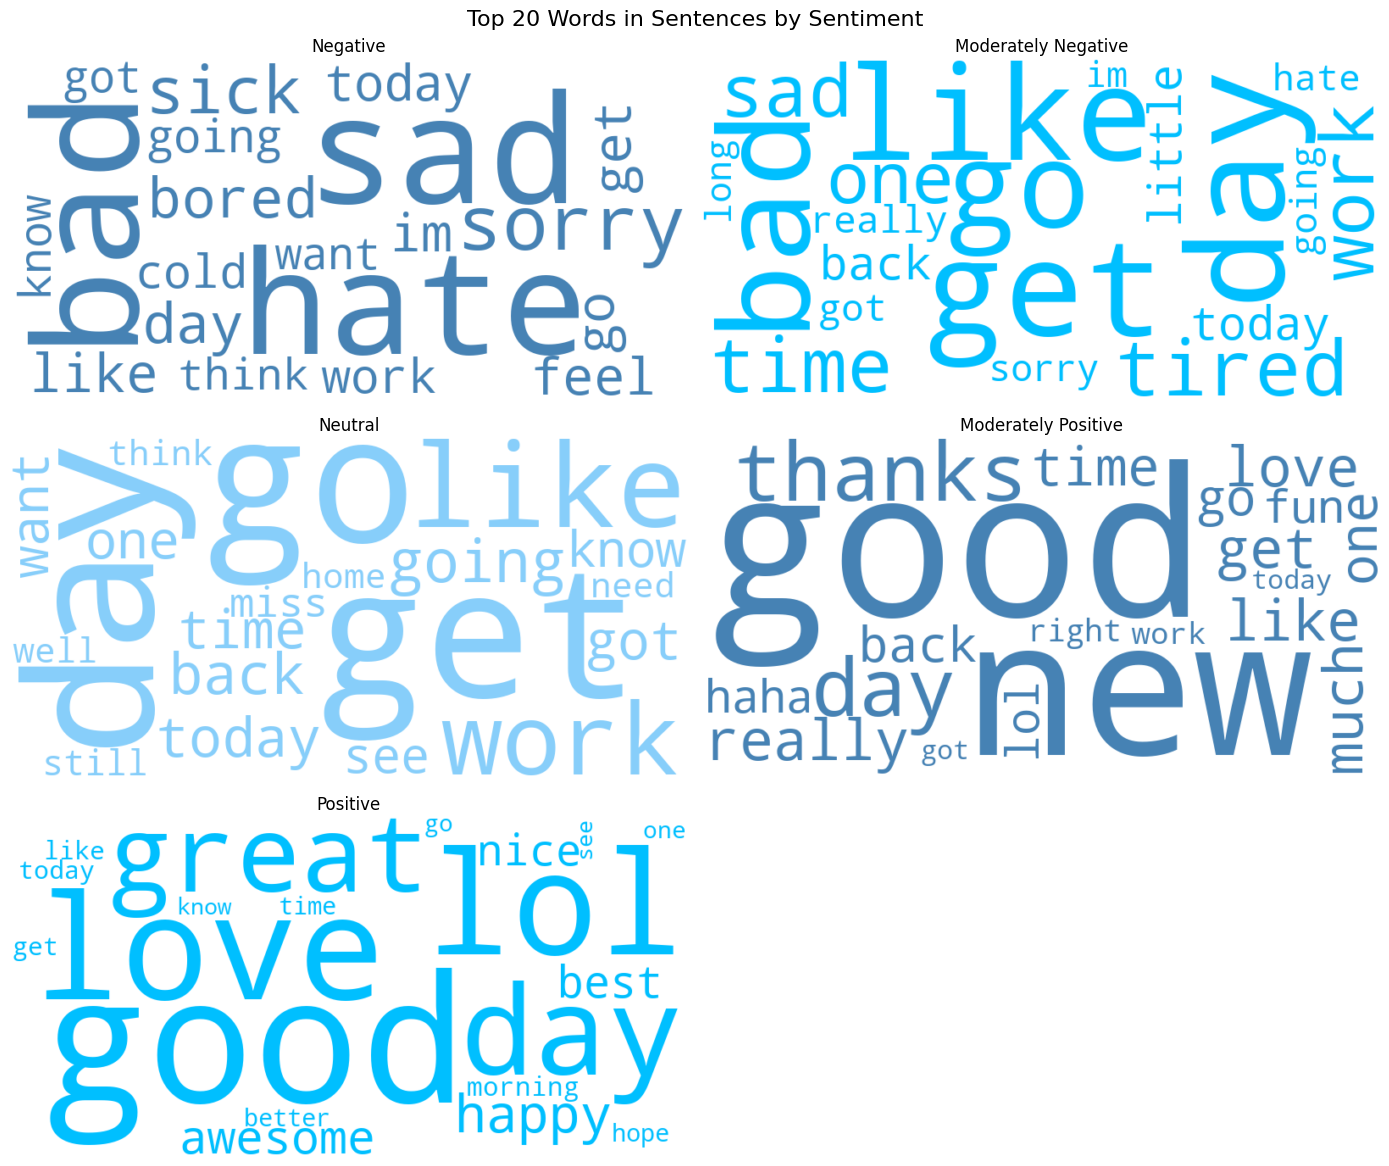

In [12]:
from wordcloud import WordCloud
import random
from collections import Counter

# Define the sentiment categories
sentiment_categories = ['Negative', 'Moderately Negative', 'Neutral', 'Moderately Positive', 'Positive']

# Custom blue colors for each sentiment category
blue_colors = ['steelblue', 'deepskyblue', 'lightskyblue']

# Shuffle the blue colors for each sentiment category
random.shuffle(blue_colors)

# Calculate the number of rows and columns for subplots based on the number of sentiment categories
num_rows = 3
num_cols = 2
total_plots = num_rows * num_cols

# Calculate the number of empty subplots to remove
num_empty_subplots = total_plots - len(sentiment_categories)

# Create subplots and set figure size
fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 12))

# Flatten the axs array for easy indexing
axs = axs.flatten()

# Iterate over each sentiment category
for i, sentiment in enumerate(sentiment_categories):
    # Filter the DataFrame for the specific sentiment category
    sentiment_df = results_df[results_df['sentiment_textblob'] == sentiment]
    
    # Combine all the clean_text values into a single string
    words = " ".join(sentiment_df['clean_text'].astype(str))
    
    # Create a custom colormap for the word cloud with the corresponding blue color
    cmap = plt.cm.colors.ListedColormap([blue_colors[i % len(blue_colors)]])
    
    # Calculate word frequencies and get the top 20 words
    word_freq = Counter(words.split())
    top_20_words = dict(word_freq.most_common(20))
    
    # Create a WordCloud object with top 20 words
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap)
    wordcloud.generate_from_frequencies(top_20_words)
    
    # Display the sentiment category
    print(f"Sentiment: {sentiment}")
    
    # Add a subplot for the word cloud
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(sentiment)
    axs[i].axis('off')

# Remove empty subplots
for i in range(num_empty_subplots):
    fig.delaxes(axs[-(i + 1)])

# Set the overall title for the subplots
plt.suptitle('Top 20 Words in Sentences by Sentiment', fontsize=16)

# Adjust the spacing between subplots for better readability
plt.tight_layout()

# Display the subplots
plt.show()
